## Rent Burden in Defined Neighborhoods
For our project we are looking at the relationship between enforcement of unsanctioned uses of public space and gentrification. This week I am going to try to create some visualizations of gentrification indicators in the neighborhoods we are looking at for our project. One displacement indicator is rent burden, residents who spend 30% or more of thier income on rent are considered rent burdened and are at a higher risk of displacement. They do not have the safety net to withstand an increase in housing costs. 

In [42]:
import pandas as pd
import geopandas as gpd

# cleaning data

getting the rent burden data on jupyter 

In [43]:
rentburden = gpd.read_file('rent_burden.csv')

looking at the data 

In [44]:
rentburden.head()

,FIPS,Geographic Identifier,Name of Area,Renter-Occupied Housing Units,Renter-Occupied Housing Units: 30 to 49 Percent,Renter-Occupied Housing Units: 50 percent or More,% Renter-Occupied Housing Units: 30 to 49 Percent,% Renter-Occupied Housing Units: 50 percent or More,geometry
0,06037101110,14000US06037101110,Census Tract 1011.10,829,225,279,27.14,33.66,None
1,06037101122,14000US06037101122,Census Tract 1011.22,230,106,53,46.09,23.04,None
2,06037101210,14000US06037101210,Census Tract 1012.10,1984,482,866,24.29,43.65,None
3,06037101220,14000US06037101220,Census Tract 1012.20,823,231,382,28.07,46.42,None
4,06037101300,14000US06037101300,Census Tract 1013,167,19,72,11.38,43.11,None


here i am cleaning the data and deleting all the empty columns

In [45]:
rentburden.columns[rentburden.isna().all()].tolist()

['geometry']

In [46]:
rentburden = rentburden.dropna(axis=1,how="all")

In [47]:
rentburden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   FIPS                                                 2346 non-null   object
 1   Geographic Identifier                                2346 non-null   object
 2   Name of Area                                         2346 non-null   object
 3   Renter-Occupied Housing Units                        2346 non-null   object
 4   Renter-Occupied Housing Units: 30 to 49 Percent      2346 non-null   object
 5   Renter-Occupied Housing Units: 50 percent or More    2346 non-null   object
 6   % Renter-Occupied Housing Units: 30 to 49 Percent    2346 non-null   object
 7   % Renter-Occupied Housing Units: 50 percent or More  2346 non-null   object
dtypes: object(8)
memory usage: 146.8+ KB


In [48]:
rentburden = rentburden.drop(labels=1, axis =0)

checking to see if it worked ;) 

In [49]:
rentburden.head()

,FIPS,Geographic Identifier,Name of Area,Renter-Occupied Housing Units,Renter-Occupied Housing Units: 30 to 49 Percent,Renter-Occupied Housing Units: 50 percent or More,% Renter-Occupied Housing Units: 30 to 49 Percent,% Renter-Occupied Housing Units: 50 percent or More
0,06037101110,14000US06037101110,Census Tract 1011.10,829,225,279,27.14,33.66
2,06037101210,14000US06037101210,Census Tract 1012.10,1984,482,866,24.29,43.65
3,06037101220,14000US06037101220,Census Tract 1012.20,823,231,382,28.07,46.42
4,06037101300,14000US06037101300,Census Tract 1013,167,19,72,11.38,43.11
5,06037101400,14000US06037101400,Census Tract 1014,424,109,143,25.71,33.73


i want to clean things up a little more so its easier to work with so I am making a new dataframe with just the percentages and shortening the column names 

In [50]:
columns = list(rentburden) 
columns

['FIPS',
 'Geographic Identifier',
 'Name of Area',
 'Renter-Occupied Housing Units',
 'Renter-Occupied Housing Units: 30 to 49 Percent',
 'Renter-Occupied Housing Units: 50 percent or More',
 '% Renter-Occupied Housing Units: 30 to 49 Percent',
 '% Renter-Occupied Housing Units: 50 percent or More']

In [51]:
columns_to_keep = ['FIPS',
                   '% Renter-Occupied Housing Units: 30 to 49 Percent',
                    '% Renter-Occupied Housing Units: 50 percent or More',
                  ]
df = rentburden[columns_to_keep]

In [52]:
df.head()

,FIPS,% Renter-Occupied Housing Units: 30 to 49 Percent,% Renter-Occupied Housing Units: 50 percent or More
0,06037101110,27.14,33.66
2,06037101210,24.29,43.65
3,06037101220,28.07,46.42
4,06037101300,11.38,43.11
5,06037101400,25.71,33.73


In [53]:
df = df.rename(columns={'% Renter-Occupied Housing Units: 30 to 49 Percent': 'PCT_thirty_plus', '% Renter-Occupied Housing Units: 50 percent or More': 'PCT_fifty_plus'})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2345
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FIPS             2345 non-null   object
 1   PCT_thirty_plus  2345 non-null   object
 2   PCT_fifty_plus   2345 non-null   object
dtypes: object(3)
memory usage: 73.3+ KB


i want to delete empty rows so i can turn the entire column into integers and find averages. some of the census tracts dont have this question completed in the dataset and are left blank, pandas doesnt seem to want to do math with empty values so i am deleting them. to do this, i replaced all the empty values with "nan" and then deleted all the rows with "nan"

In [55]:
import numpy as np

In [56]:
df['PCT_thirty_plus'].replace('', np.nan, inplace=True)
df['PCT_fifty_plus'].replace('', np.nan, inplace=True)

In [57]:
df.dropna(subset=['PCT_thirty_plus'], inplace=True)
df.dropna(subset=['PCT_fifty_plus'], inplace=True)

In [58]:
df

,FIPS,PCT_thirty_plus,PCT_fifty_plus
0,06037101110,27.14,33.66
2,06037101210,24.29,43.65
3,06037101220,28.07,46.42
4,06037101300,11.38,43.11
5,06037101400,25.71,33.73
...,...,...,...
2331,06037980019,0,33.33
2336,06037980024,0,16
2338,06037980026,0,0
2341,06037980031,79.17,0


here i am turning the rows into floats so i can do math 

In [59]:
df['PCT_thirty_plus'] = df['PCT_thirty_plus'].astype(float)
df['PCT_fifty_plus'] = df['PCT_fifty_plus'].astype(float)

In [60]:
df.set_index('FIPS')

,PCT_thirty_plus,PCT_fifty_plus
FIPS,,
06037101110,27.14,33.66
06037101210,24.29,43.65
06037101220,28.07,46.42
06037101300,11.38,43.11
06037101400,25.71,33.73
...,...,...
06037980019,0.00,33.33
06037980024,0.00,16.00
06037980026,0.00,0.00


# sort data

i want to breakdown my data set by neighborhood so i am making lists of all the fips codes that fall into each neihgborhood of interest for our project. 

In [61]:
westlake = ['06037195710',
 '06037195802',
 '06037195903',
 '06037208001',
 '06037208301',
 '06037208302',
 '06037208401',
 '06037208402',
 '06037208501',
 '06037208502',
 '06037208610',
 '06037208620',
 '06037208710',
 '06037208720',
 '06037208801',
 '06037208802',
 '06037208902',
 '06037208903',
 '06037208904',
 '06037209103',
 '06037209104',
 '06037209105',
 '06037209106',
 '06037209201',
 '06037209202',
 '06037209300',
 '06037209401',
 '06037209402',
 '06037209403',
 '06037209510',
 '06037209520',
 '06037210010',
 '06037211121',
 '06037211123',
 '06037211124',
 '06037212202',
 '06037212204',
 '06037213401']


In [62]:
jefferson_park = ['06037218701',
 '06037218702',
 '06037218800',
 '06037218900',
 '06037219010',
 '06037219020',
 '06037219300',
 '06037221401',
 '06037221402',
 '06037222001']


In [63]:
lincoln_heights = ['06037199001',
 '06037199002',
 '06037199110',
 '06037199120',
 '06037199201',
 '06037199202',
 '06037199300',
 '06037199400',
 '06037199700',
 '06037199801',
 '06037199802',
 '06037199900',
 '06037203500',
 '06037206010',
 '06037206020',
 '06037980010']


In [64]:
boyle_heights = ['06037203100',
 '06037203200',
 '06037203300',
 '06037203500',
 '06037203601',
 '06037203602',
 '06037203710',
 '06037203720',
 '06037203800',
 '06037203900',
 '06037204110',
 '06037204120',
 '06037204200',
 '06037204300',
 '06037204410',
 '06037204420',
 '06037204600',
 '06037204700',
 '06037204810',
 '06037204820',
 '06037204910',
 '06037204920',
 '06037205110',
 '06037205120',
 '06037206020',
 '06037206050',
 '06037206051',
 '06037206052',
 '06037206053',
 '06037206054']


In [65]:
los_feliz = ['06037188201',
 '06037188202',
 '06037189101',
 '06037189102',
 '06037189201',
 '06037189202',
 '06037189300',
 '06037190401',
 '06037190402',
 '06037191201',
 '06037195201',
 '06037195202',
 '06037195300',
 '06037980009']


In [66]:
fairfax = ['06037192001',
 '06037192002',
 '06037194401',
 '06037214000',
 '06037214400',
 '06037214501']


now im making a new data frame for each neighborhood using "isin" this creates a dataframe where a 'FIPS' from one list is in a 'FIPS' from another data frame

In [67]:
westlake=df.loc[df['FIPS'].isin(westlake)]
jefferson_park=df.loc[df['FIPS'].isin(jefferson_park)]
lincoln_heights=df.loc[df['FIPS'].isin(lincoln_heights)]
boyle_heights=df.loc[df['FIPS'].isin(boyle_heights)]
los_feliz=df.loc[df['FIPS'].isin(los_feliz)]
fairfax=df.loc[df['FIPS'].isin(fairfax)]

check it out!

In [68]:
westlake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 469 to 620
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS             31 non-null     object 
 1   PCT_thirty_plus  31 non-null     float64
 2   PCT_fifty_plus   31 non-null     float64
dtypes: float64(2), object(1)
memory usage: 992.0+ bytes


In [69]:
westlake

,FIPS,PCT_thirty_plus,PCT_fifty_plus
469,06037195710,24.19,27.51
471,06037195802,22.58,31.56
476,06037195903,22.05,27.74
548,06037208301,13.77,40.34
549,06037208302,32.35,30.46
550,06037208401,34.88,23.21
551,06037208402,30.03,32.44
552,06037208501,27.50,21.39
553,06037208502,28.13,18.17
554,06037208610,22.65,32.35


in the end i want to compare rent burden's across the varius neighborhoods so i am going to find the average of each column in each dataframe in order to draw comparisons in each neighborhood. 

I am starting with westlake. I am creating new values for each average, "wTm" stands for the **mean** of all the FIPS in **Westlake** that spend between **thirty** and fortynine percent of thier income on rent. "wFm" stands for the **mean** if all the FIPs in **Westlake** that spend **fifty** percent or more of thier income on rent

In [70]:
wTm = westlake["PCT_thirty_plus"].mean()
wFm = westlake["PCT_fifty_plus"].mean()
wTm, wFm

(27.759354838709676, 30.086774193548393)

i am going to do this with each neighborhood in order to make comparisons

In [71]:
jefferson_park

,FIPS,PCT_thirty_plus,PCT_fifty_plus
655,06037218701,20.93,37.79
656,06037218702,32.14,36.38
657,06037218800,31.64,21.50
658,06037218900,24.86,37.49
659,06037219010,20.90,28.50
660,06037219020,23.69,30.62
661,06037219300,20.18,37.00
676,06037221401,24.84,49.68
677,06037221402,26.11,41.51
685,06037222001,26.46,52.22


In [72]:
jTm = jefferson_park["PCT_thirty_plus"].mean()
jFm = jefferson_park["PCT_fifty_plus"].mean()
jTm, jFm

(25.175000000000004, 37.269000000000005)

In [74]:
lTm = lincoln_heights["PCT_thirty_plus"].mean()
lFm = lincoln_heights["PCT_fifty_plus"].mean()
lTm, lFm

(23.305000000000003, 33.6625)

In [76]:
bTm = boyle_heights["PCT_thirty_plus"].mean()
bFm = boyle_heights["PCT_fifty_plus"].mean()
lfTm = los_feliz["PCT_thirty_plus"].mean()
lfFm = los_feliz["PCT_fifty_plus"].mean()
fTm = fairfax["PCT_thirty_plus"].mean()
fFm = fairfax["PCT_fifty_plus"].mean()
bTm, bFm


(28.169166666666666, 31.114583333333332)

now im creating a new data frame with all the averages. One column has all percentage of each neihgborhood that spends between thirty and fortynine percent of thier income on rent and the other has the percent of eac neighborhood that spends fifty percent or more of thier income on rent

In [78]:
f1 = pd.DataFrame({'pecnt_thirty': [wTm, jTm, lTm, bTm, lfTm, fTm], 
                   'pecnt_fifty_plu': [wFm, jFm, lFm, bFm, lfFm, fFm]})
f1

,pecnt_thirty,pecnt_fifty_plu
0,27.759355,30.086774
1,25.175000,37.269000
2,23.305000,33.662500
3,28.169167,31.114583
4,22.429231,23.641538
5,23.546667,24.893333


adding a column by neighborhood gotta be really careful with this to make sure that every neighborhood has the rigt column. next week i am going to try to figure out how to do this in a safer way.

In [80]:
f1['neighborhood'] = ['westlake', 
              'jefferson park', 
              'lincoln_heights', 
              'boyle_heihgts',
              'los feliz',
              'fairfax',]
f1

,pecnt_thirty,pecnt_fifty_plu,neighborhood
0,27.759355,30.086774,westlake
1,25.175000,37.269000,jefferson park
2,23.305000,33.662500,lincoln_heights
3,28.169167,31.114583,boyle_heihgts
4,22.429231,23.641538,los feliz
5,23.546667,24.893333,fairfax


change the neighborhood column into the axis name

In [82]:
f1.index = f1['neighborhood']
f1 = f1.drop(['neighborhood'], axis=1)
f1

,pecnt_thirty,pecnt_fifty_plu
neighborhood,,
westlake,27.759355,30.086774
jefferson park,25.175000,37.269000
lincoln_heights,23.305000,33.662500
boyle_heihgts,28.169167,31.114583
los feliz,22.429231,23.641538
fairfax,23.546667,24.893333


now we are gonna plot! cool! for the midterm i am going to make this way more better and try to use plotly. this process felt unnecessarily clunky. 

<AxesSubplot: xlabel='neighborhood'>

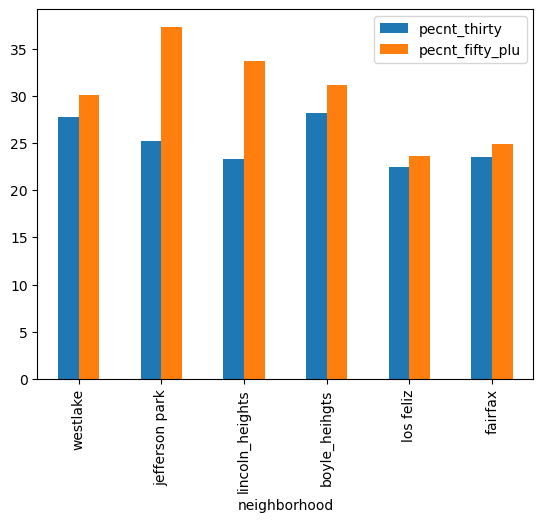

In [85]:
f1.plot.bar()